# The Neural Code: Exercises 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import scipy.stats
from scipy.signal import convolve2d
from mpl_toolkits.mplot3d import Axes3D

__Exercise 1: Convolution as Filter__

(a) Load the fluoresence trace exampleCAtrace.npy from a calcium imaging experiment and plot it
with the appropriate time axis (sampling frequency is 20 Hz).

Text(0.5, 1.0, 'calcium imaging fluorescence trace')

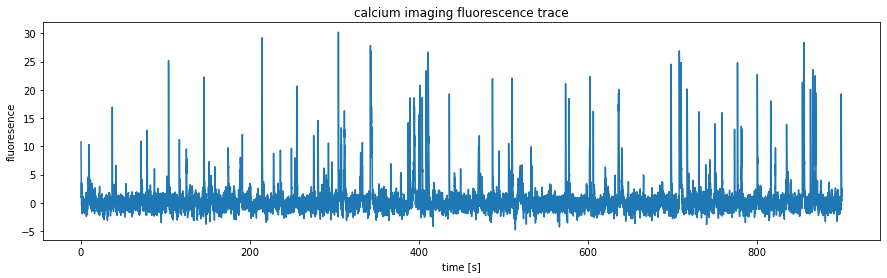

In [2]:
# load trace
fluorescence = np.load('exampleCAtrace.npy')
time_axis = np.arange(0, len(fluorescence) * (1/20), 1/20)

# plot trace
plt.figure(figsize=(15,4))
plt.plot(time_axis, fluorescence)
plt.xlabel('time [s]')
plt.ylabel('fluoresence')
plt.title('calcium imaging fluorescence trace')

(b) Let's now focus on a small snippet from sample 1000 to 2000, which contains three visible tran-
sients.

Text(0.5, 1.0, 'calcium imaging fluorescence trace from t = 50s to t = 100s')

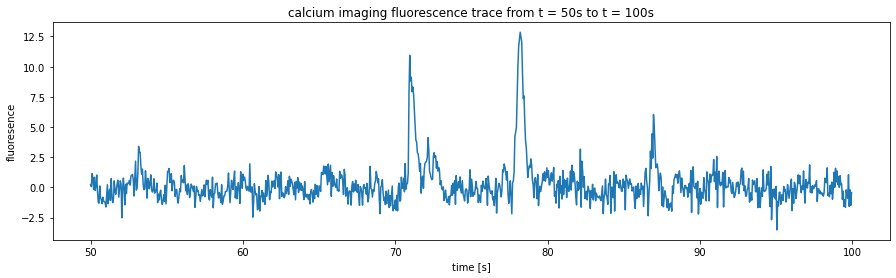

In [3]:
# focus on snippet
fluorescence_snip = fluorescence[1000:2000]
time_axis_snip = time_axis[1000:2000]

# plot snippet
plt.figure(figsize=(15,4))
plt.plot(time_axis_snip, fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('fluoresence')
plt.title('calcium imaging fluorescence trace from t = 50s to t = 100s')

(c) Convolve the snippet with a Gaussian kernel with $\sigma = 250 ms$ and interpret its action.

Text(0.5, 1.0, 'gaussian kernel')

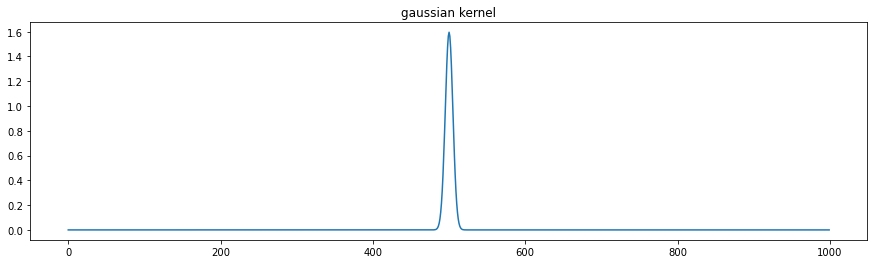

In [4]:
# construct kernel
t = np.arange(50, 100, 1/20)
mean = 75
sigma = 0.25
gaussian = scipy.stats.norm(mean, sigma).pdf(t)

# plot kernel
plt.figure(figsize=(15,4))
plt.plot(gaussian)
plt.title('gaussian kernel')

Text(0.5, 1.0, 'calcium imaging fluorescence trace convolved with a gaussian kernel')

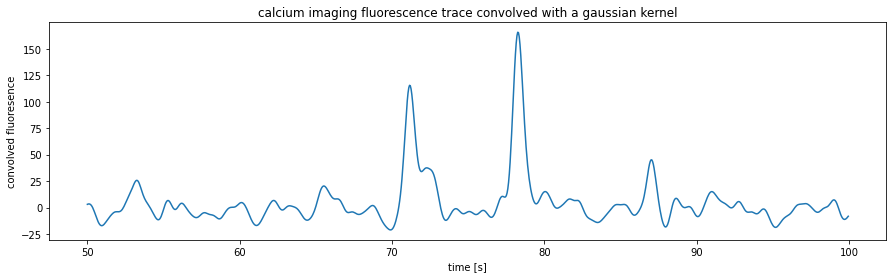

In [6]:
# convolve
convolved_fluorescence_snip = np.convolve(fluorescence_snip, gaussian, mode = 'same')

# plot convolved trace
plt.figure(figsize=(15,4))
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')
plt.title('calcium imaging fluorescence trace convolved with a gaussian kernel')

The gaussian kernel smoothes the fluorescence curve.

(d) Change $\sigma$ and explore the effect.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

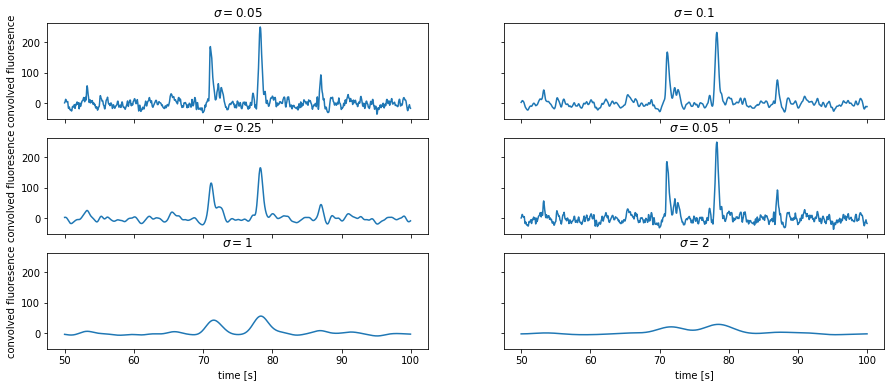

In [6]:
# vary sigma
sigmas = [0.05, 0.1, 0.25, 0.05, 1, 2]
t = np.arange(50, 100, 1/20)
mean = 75

# plot convolved traces
fig, ax = plt.subplots(3, 2, figsize = (15, 6), sharex = True, sharey = True)
ax = ax.reshape(-1)
for i in range(len(sigmas)):
    sigma = sigmas[i]
    gaussian = scipy.stats.norm(mean, sigma).pdf(t)
    convolved_fluorescence_snip = np.convolve(fluorescence_snip, gaussian, mode = 'same')
    ax[i].plot(time_axis_snip, convolved_fluorescence_snip)
    if i == 4 or i == 5:
        ax[i].set_xlabel('time [s]')
    if i % 2 == 0:
        ax[i].set_ylabel('convolved fluoresence')
    ax[i].set_title('$\sigma = {}$'.format(sigma))
plt.tight_layout

(e) Next generate a new kernel by multiplying the Gaussian kernel ($\sigma = 250 ms$) with $-sin(2 \pi t)$ and
plot the convolution. Why is the convolution approximating a differentiation?

Text(0.5, 1.0, 'first derivative kernel')

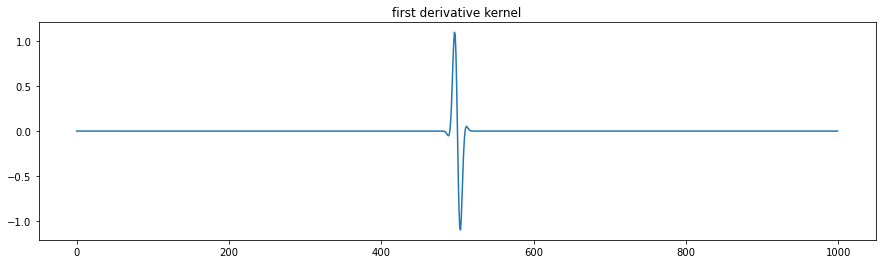

In [7]:
# construct kernel
t = np.arange(50, 100, 1/20)
mean = 75
sigma = 0.25
gaussian = scipy.stats.norm(mean, sigma).pdf(t)
sin = -np.sin(2 * np.pi * t)
first_derivative_kernel = gaussian * sin

# plot kernel
plt.figure(figsize=(15,4))
plt.plot(first_derivative_kernel)
plt.title('first derivative kernel')

Text(0.5, 1.0, 'calcium imaging fluorescence trace convolved with a first derivative kernel')

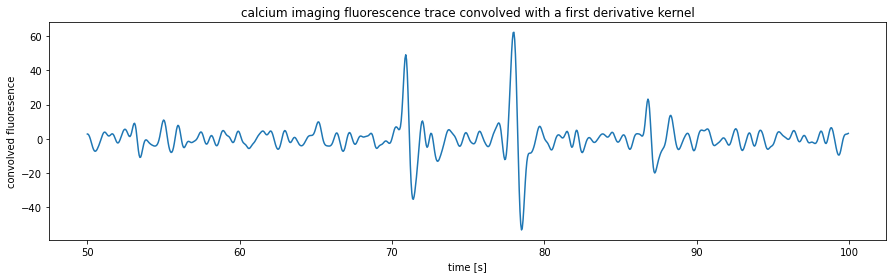

In [8]:
# convolve
convolved_fluorescence_snip = np.convolve(fluorescence_snip, first_derivative_kernel, mode = 'same')

# plot convolved trace
plt.figure(figsize=(15,4))
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')
plt.title('calcium imaging fluorescence trace convolved with a first derivative kernel')

It is approximating a differentation because the large positive peak of the kernel 'caputures' rising slopes and the large negative peak falling slopes.

Calculating the derivative makes sense because it is much narrower and earlier in time and therefore much more related to neuronal processing.

(f) Construct a kernel that approximates a second derivative and verify.

Text(0.5, 1.0, 'second derivative kernel')

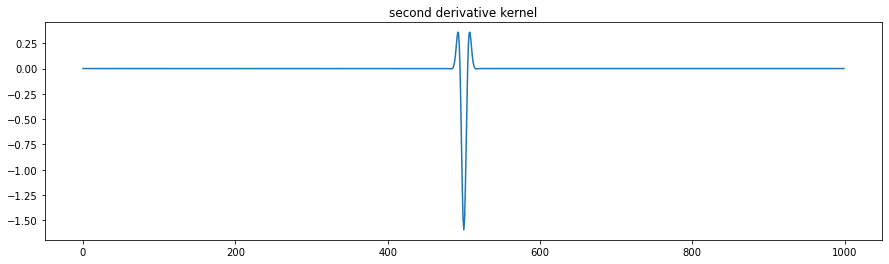

In [9]:
# construct kernel
t = np.arange(50, 100, 1/20)
mean = 75
sigma = 0.25
gaussian = scipy.stats.norm(mean, sigma).pdf(t)
cos = np.cos(2 * np.pi * t)
second_derivative_kernel = -gaussian * cos

# plot kernel
plt.figure(figsize=(15,4))
plt.plot(second_derivative_kernel)
plt.title('second derivative kernel')

Text(0.5, 1.0, 'calcium imaging fluorescence trace convolved with a second derivative kernel')

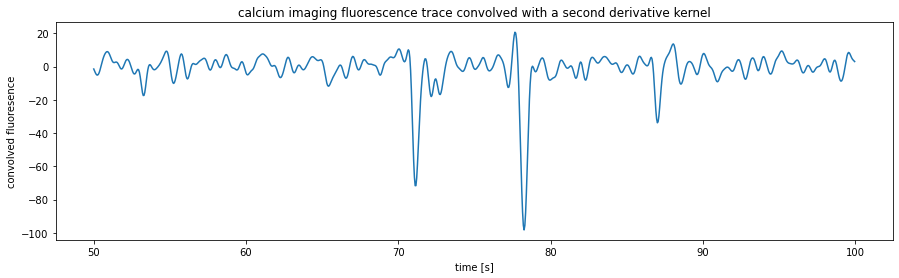

In [10]:
# convolve
convolved_fluorescence_snip = np.convolve(fluorescence_snip, second_derivative_kernel, mode = 'same')

# plot convolved trace
plt.figure(figsize=(15,4))
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')
plt.title('calcium imaging fluorescence trace convolved with a second derivative kernel')

Text(0.5, 1.0, 'second derivative kernel')

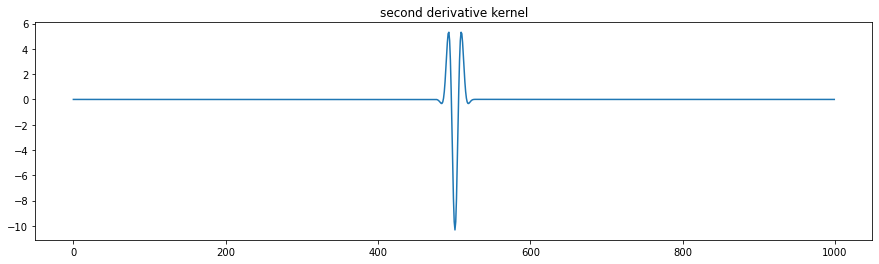

In [11]:
# (not sure whether this also works)

# construct kernel
second_derivative_kernel = np.convolve(first_derivative_kernel, first_derivative_kernel, mode = 'same')

# plot kernel
plt.figure(figsize=(15,4))
plt.plot(second_derivative_kernel)
plt.title('second derivative kernel')

Text(0.5, 1.0, 'calcium imaging fluorescence trace convolved with a second derivative kernel')

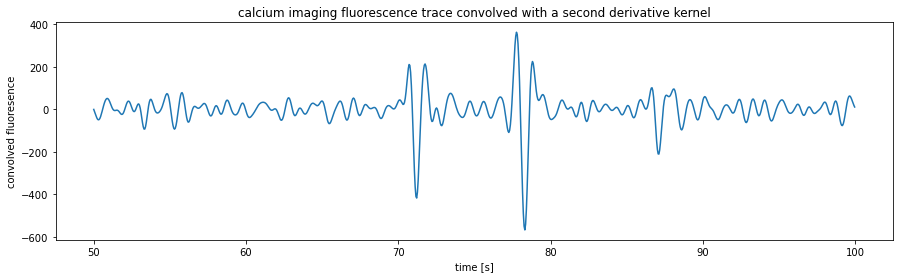

In [12]:
# convolve
convolved_fluorescence_snip = np.convolve(fluorescence_snip, second_derivative_kernel, mode = 'same')

# plot convolved trace
plt.figure(figsize=(15,4))
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')
plt.title('calcium imaging fluorescence trace convolved with a second derivative kernel')

Obtaining kernels: 1. derivative kernel similar to 1. derivative of gaussian, 2. derivative kernel similar to 2. derivative of gaussian

__Exercise 2: Image filters__

(a) Load the image freiburg.jpeg with img=matplotlib.image.imread(....), average over the
three color channels (img = np.mean(np.array(img),axis=2)) and plot (matplotlib.pyplot.imshow).

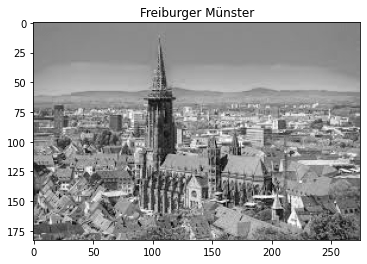

In [13]:
# load image
img=image.imread('freiburg.jpeg')

# average color channels
img = np.mean(np.array(img), axis=2)

# plot image
plt.figure()
_ = plt.imshow(img, cmap='gray')
_ = plt.title('Freiburger Münster')

(b) Generate a 2-d Gaussian kernel $\sigma = 5$ pixels (check out numpy.mgrid) and convolve the image
(use from scipy.signal import convolve2d) to obtain a blurred image.

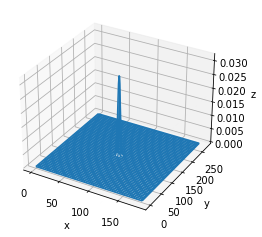

In [14]:
# generate kernel
X, Y = np.mgrid[0:img.shape[0], 0:img.shape[1]]
mean_x = 91
mean_y = 137
sigma = 5

Gaussian = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        Gaussian[i, j] = scipy.stats.multivariate_normal.pdf([X[i, j], Y[i, j]], [mean_x, mean_y], [sigma, sigma])
        
# plot kernel
plt.figure()
ax = plt.axes(projection='3d')
_ = ax.plot_wireframe(X = X, Y = Y, Z = Gaussian)
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')

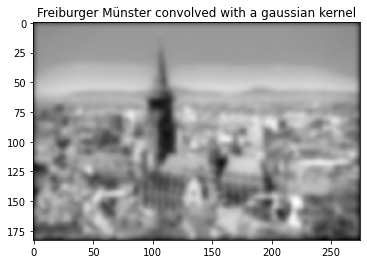

In [15]:
# convolve
img_convolved = convolve2d(img, Gaussian, mode='same')

# plot convolved image
plt.figure()
_ = plt.imshow(img_convolved, cmap = 'gray')
_ = plt.title('Freiburger Münster convolved with a gaussian kernel')

(c) Next, write a function that implements a Gabor kernel.

$$\kappa(\vec{x}) = exp[-(\vec{x})^2/(2\sigma^2)]~cos(\vec{k}\cdot\vec{x}-\phi)$$

with $\vec{x} = (x, y)$ and plot it for $\sigma = 5$ pixels, varying values of $\phi$ and various vectors $\vec{k}$ with $|\vec{k}| = 0.5$. You can obtain vector $\vec{k}$ with constant length $L$ via $\vec{k} = L(cos (\alpha), sin (\alpha))$.

In [16]:
# gabor kernel
def gabor(sigma, k, phi):
    
    # Define variables to control size of kernel
    m = (sigma) * 9 - (sigma - 1)
    n = (sigma) * 9 - (sigma - 1)
    st = (sigma) * 9 - (sigma - 1)
    
    # Create meshgrid
    X,Y = np.meshgrid(np.linspace(-(m)/2,(m)/2,st), np.linspace(-(n)/2,(n)/2,st))
    
    # x vector * k
    x_theta = X * k[0] + Y * k[1]
    
    # x vector ** 2
    std = X ** 2 + Y ** 2
    
    # Compute kernel
    kernel = np.exp(-std / (2 * sigma ** 2)) * np.cos(x_theta - phi)

    return kernel

In [17]:
# values for gabor kernels
phi_values = [0, np.pi/4, np.pi/2, np.pi/4 * 3, np.pi]
k_vectors = [0.5 * np.array([np.cos(i), np.sin(i)]) for i in phi_values]
sigma = 5

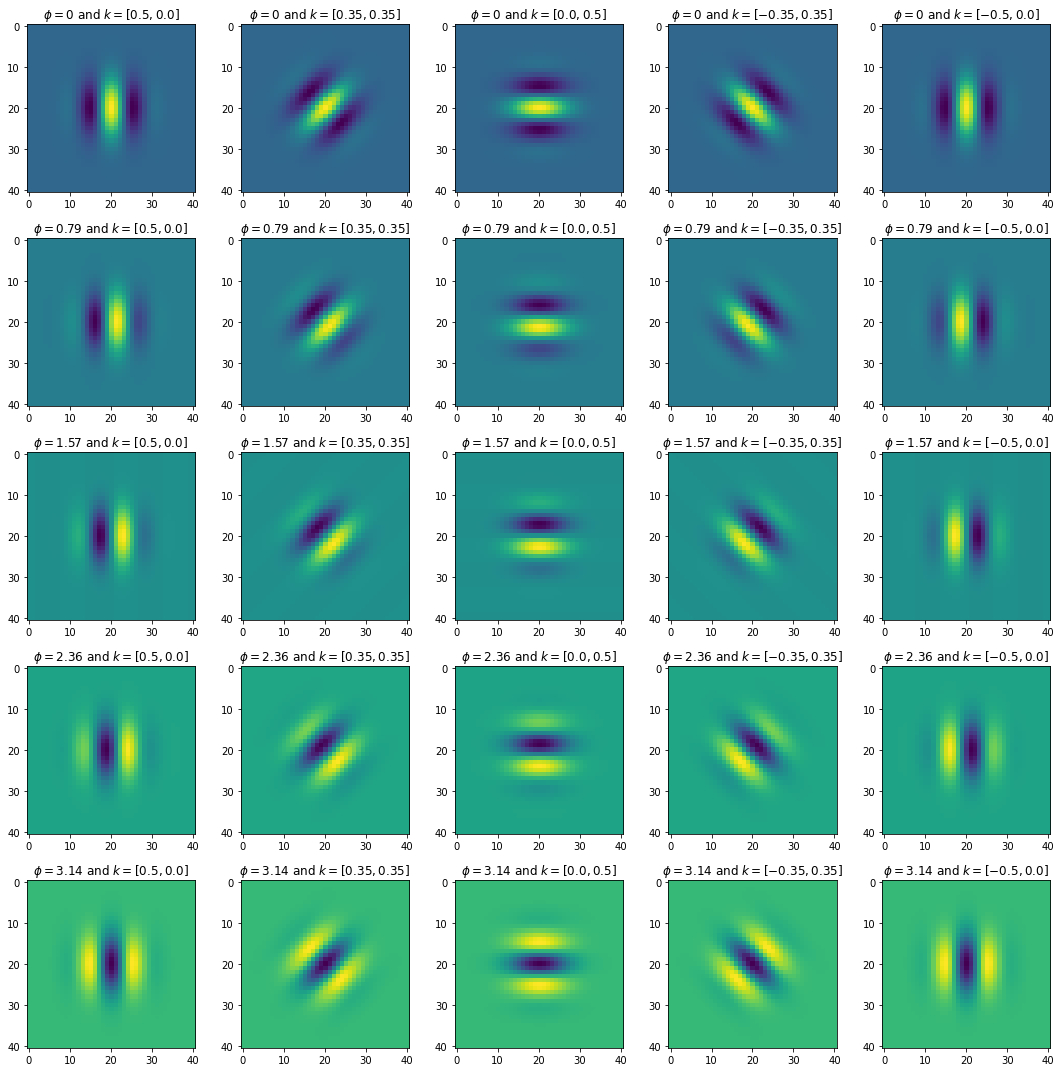

In [18]:
# plot gabor kernels
G_arrays = np.zeros((len(phi_values), len(k_vectors), 41, 41))

fig, ax = plt.subplots(5, 5, figsize = (15, 15))
for k in range(len(phi_values)):
    for l in range(len(k_vectors)):
        G_array = gabor(sigma, k_vectors[l], phi_values[k])
        ax[k,l].imshow(G_array)
        ax[k,l].set_title('$\phi = {}$ and $k = [{},{}]$'.format(np.around(phi_values[k], 2), np.around(k_vectors[l][0], 2), np.around(k_vectors[l][1], 2)))
        G_arrays[k, l, :, :] = G_array
plt.tight_layout()

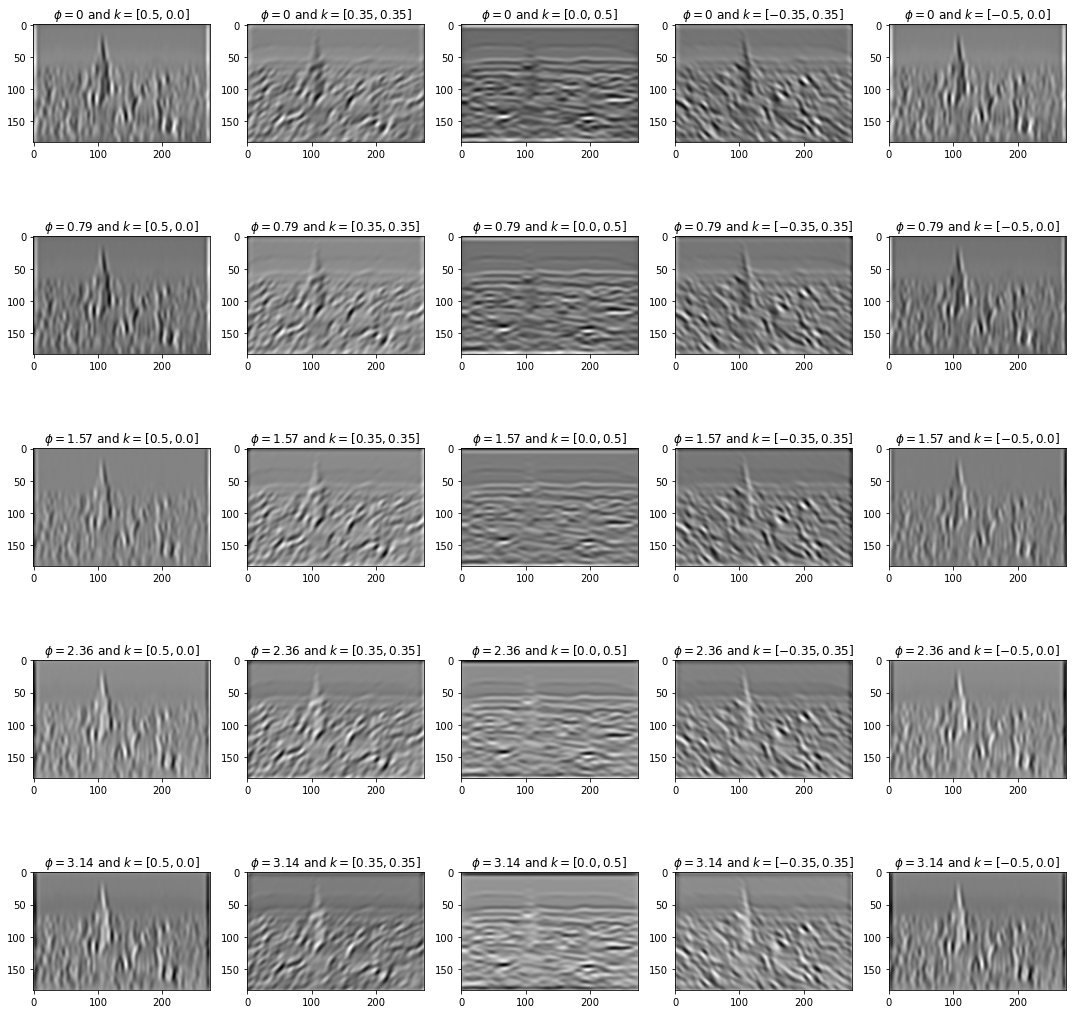

In [19]:
# plot image convolved with gabor kernels
convolved_images = np.zeros((len(phi_values), len(k_vectors), img.shape[0], img.shape[1]))

fig, ax = plt.subplots(5, 5, figsize = (15, 15))
for k in range(len(phi_values)):
    for l in range(len(k_vectors)):
        G_array = G_arrays[k, l, :, :]
        convolved_img = convolve2d(img, G_array, mode = 'same')
        ax[k,l].imshow(convolved_img, cmap = 'gray')
        ax[k,l].set_title('$\phi = {}$ and $k = [{},{}]$'.format(np.around(phi_values[k], 2), np.around(k_vectors[l][0], 2), np.around(k_vectors[l][1], 2)))
        convolved_images[k, l, :, :] = convolved_img
plt.tight_layout()

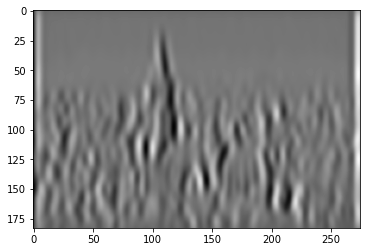

In [20]:
G_array = G_arrays[1, 0, :, :]
convolved_img = convolve2d(img, G_array, mode = 'same')
plt.imshow(convolved_img, cmap = 'gray')

(d) Which value of $\phi$ approximates a spatial derivative (edge detector)?

$\phi = \frac{\pi}{2}$ approximates a spatial derivative.

(e) Obtain spatial derivatives for varying directions $\vec{k}$ with $|\vec{k}| = 0.5$.

See 2.(c).

(f) Now change the length of the wave vector $|\vec{k}|$. What is the effect of $|\vec{k}|$ on the convolutions?

In [21]:
# values for gabor kernels
angle_values = [0, np.pi/4, np.pi/2, np.pi/4 * 3, np.pi]
phi = np.pi/2
k_scalings = [0.1, 0.2, 0.5, 1.0, 2.0]
k_vectors = [np.array([np.cos(i), np.sin(i)]) for i in phi_values]
sigma = 5

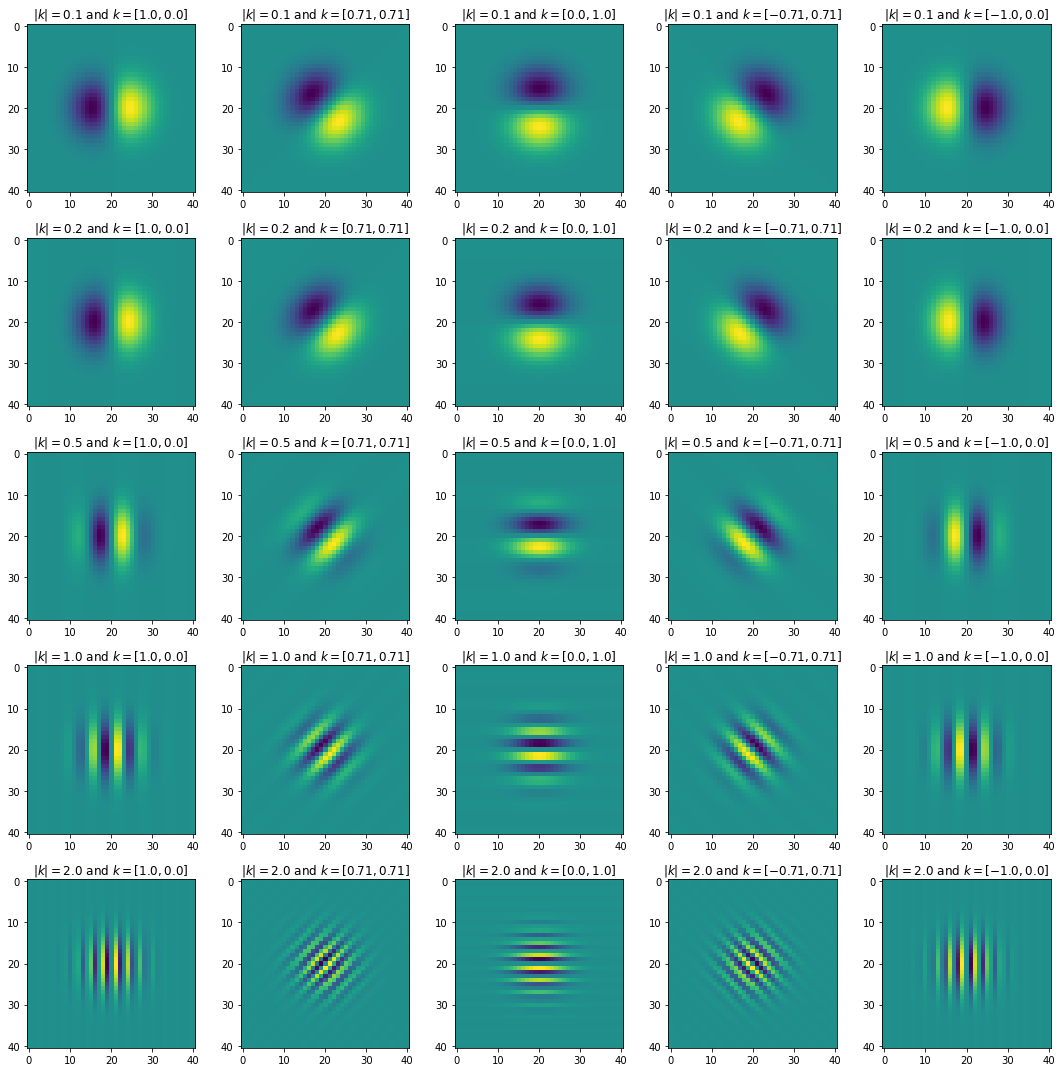

In [22]:
# plot gabor kernels
G_arrays = np.zeros((len(k_scalings), len(k_vectors), 41, 41))

fig, ax = plt.subplots(5, 5, figsize = (15, 15))
for k in range(len(k_scalings)):
    for l in range(len(k_vectors)):
        G_array = gabor(sigma, k_scalings[k] * k_vectors[l], phi)
        ax[k,l].imshow(G_array)
        ax[k,l].set_title('$|k| = {}$ and $k = [{},{}]$'.format(k_scalings[k], np.around(k_vectors[l][0], 2), np.around(k_vectors[l][1], 2)))
        G_arrays[k, l, :, :] = G_array
plt.tight_layout()

Effect of $k$: changes spatial frequency.

Effect of $\phi$: changes orientation.

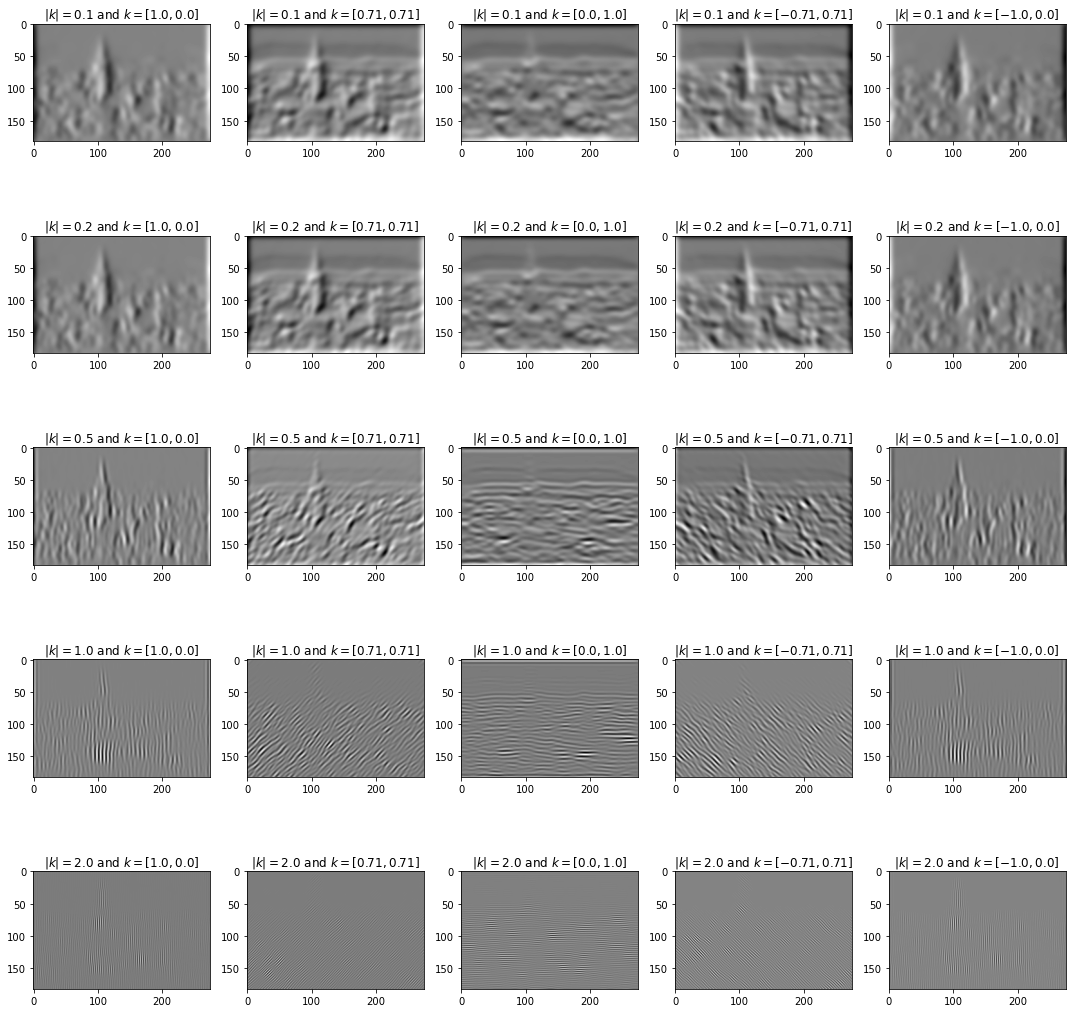

In [23]:
# plot image convolved with gabor kernels
convolved_images = np.zeros((len(k_scalings), len(k_vectors), img.shape[0], img.shape[1]))

fig, ax = plt.subplots(5, 5, figsize = (15, 15))
for k in range(len(k_scalings)):
    for l in range(len(k_vectors)):
        G_array = G_arrays[k, l, :, :]
        convolved_img = convolve2d(img, G_array, mode = 'same')
        ax[k,l].imshow(convolved_img, cmap = 'gray')
        ax[k,l].set_title('$|k| = {}$ and $k = [{},{}]$'.format(k_scalings[k], np.around(k_vectors[l][0], 2), np.around(k_vectors[l][1], 2)))
        convolved_images[k, l, :, :] = convolved_img
plt.tight_layout()